In [10]:
from google.colab import files
uploaded = files.upload()

# After uploading, you can read the file
import pandas as pd
df = pd.read_csv("netflix_titles.csv")

# Display the first few rows of the DataFrame
df.head()

Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [14]:
# Check missing values
df.isnull().sum()

# Fill missing values
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['country'] = df['country'].fillna("Unknown")
df.dropna(subset=['cast', 'director'], inplace=True)

# Check after cleaning
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [15]:
# Strip whitespace and convert to datetime
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='mixed')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Display results
df[['date_added', 'year_added']].head()

,date_added,year_added
2,2021-09-24,2021
5,2021-09-24,2021
6,2021-09-24,2021
7,2021-09-24,2021
8,2021-09-24,2021


In [16]:
# Extract the first genre from the listed_in column
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

# Display the first few rows to check the new column
df[['listed_in', 'primary_genre']].head()

,listed_in,primary_genre
2,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
5,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
6,Children & Family Movies,Children & Family Movies
7,"Dramas, Independent Movies, International Movies",Dramas
8,"British TV Shows, Reality TV",British TV Shows


In [17]:
# Function to classify content into age groups
def categorize_age(rating):
    if rating in ["TV-MA", "R", "NC-17"]:
        return "Adult"
    elif rating in ["TV-14", "PG-13"]:
        return "Teen"
    elif rating in ["TV-Y", "G", "TV-Y7", "PG"]:
        return "Kids"
    else:
        return "General"

# Apply function to create a new column
df['age_group'] = df['rating'].apply(categorize_age)

# Display the first few rows to verify
df[['rating', 'age_group']].head()

,rating,age_group
2,TV-MA,Adult
5,TV-MA,Adult
6,PG,Kids
7,TV-MA,Adult
8,TV-14,Teen


<ipython-input-18-c4afcbc4cdc1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='coolwarm')


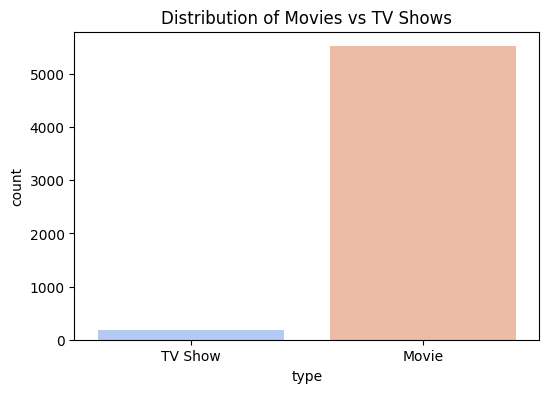

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='coolwarm')
plt.title("Distribution of Movies vs TV Shows")
plt.show()

<ipython-input-19-c99a4625c270>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['primary_genre'], order=df['primary_genre'].value_counts().index[:10], palette='viridis')


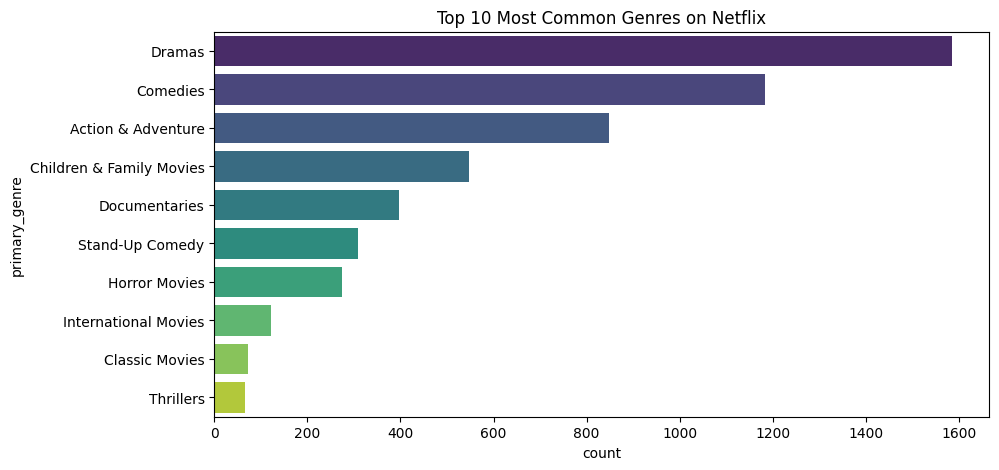

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['primary_genre'], order=df['primary_genre'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.show()

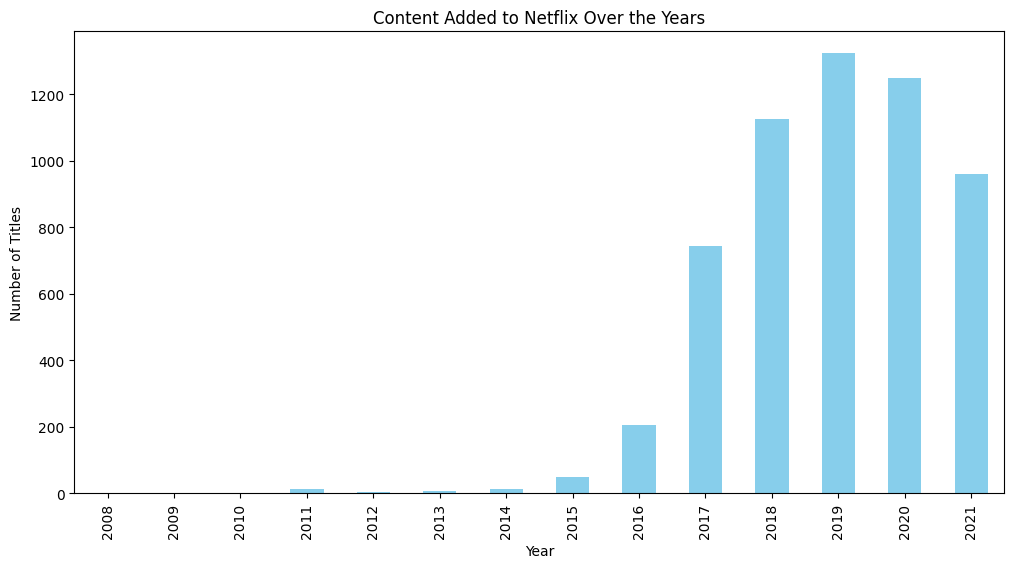

In [20]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

<ipython-input-21-b021ce07f9aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[df['country'].isin(top_countries)]['country'], order=top_countries, palette="magma")


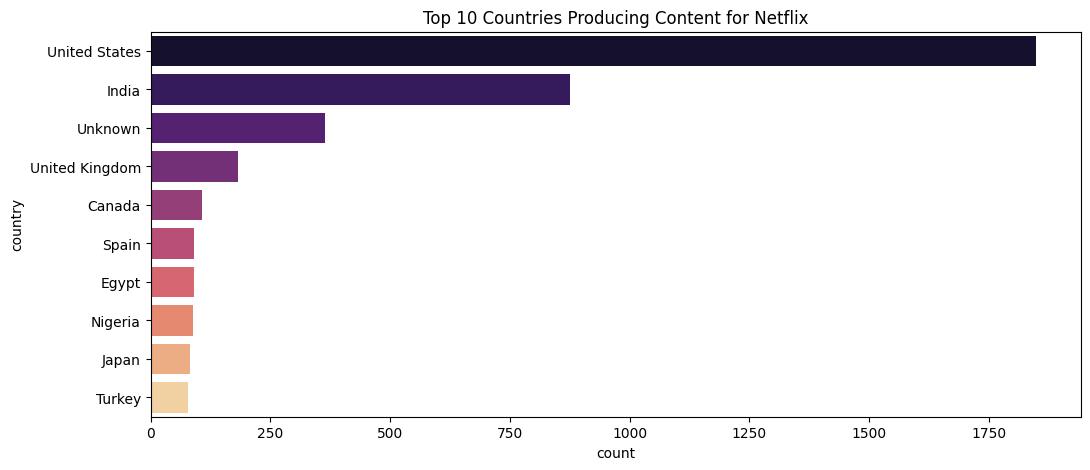

In [21]:
plt.figure(figsize=(12,5))
top_countries = df['country'].value_counts().index[:10]
sns.countplot(y=df[df['country'].isin(top_countries)]['country'], order=top_countries, palette="magma")
plt.title("Top 10 Countries Producing Content for Netflix")
plt.show()

In [22]:
df['duration'] = df['duration'].fillna('0 min')

# Separate Movies and TV Shows
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

# Convert movie durations from 'min' to numeric
df_movies['duration'] = df_movies['duration'].str.replace(' min', '', regex=True).astype(int)

# Convert TV show durations to extract number of seasons
df_shows['duration'] = df_shows['duration'].str.replace(' Season', '', regex=True).str.replace('s', '', regex=True).astype(int)

# Longest & Shortest Movies
print("Longest Movies:")
print(df_movies.nlargest(5, 'duration')[['title', 'duration']])

print("\nShortest Movies:")
print(df_movies.nsmallest(5, 'duration')[['title', 'duration']])

Longest Movies:
                            title  duration
2491       The School of Mischief       253
2487               No Longer kids       237
2484           Lock Your Girls In       233
2488              Raya and Sakina       230
166   Once Upon a Time in America       229

Shortest Movies:
                                                  title  duration
5541                                    Louis C.K. 2017         0
5794                              Louis C.K.: Hilarious         0
5813               Louis C.K.: Live at the Comedy Store         0
1484                                   Cops and Robbers         8
2858  Calico Critters: Everyone's Big Dream Flying i...        11


<ipython-input-23-1d9c7aa36029>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')


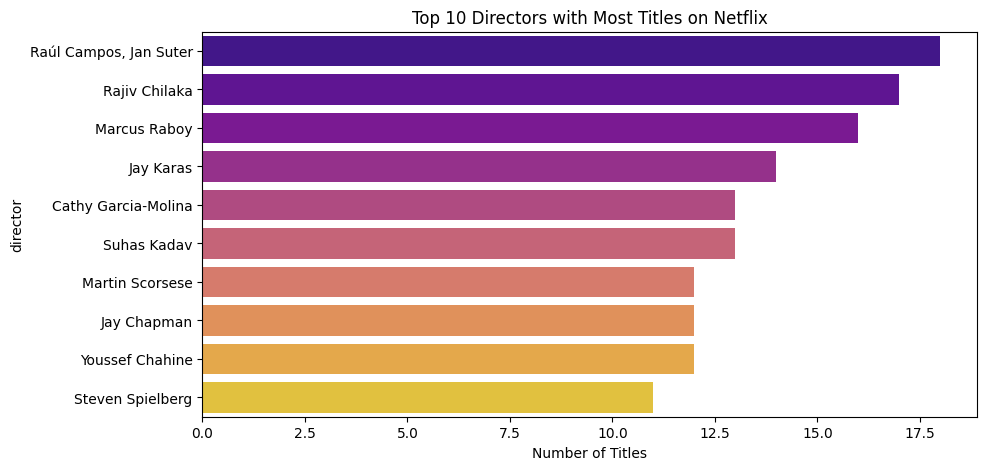

In [23]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.show()

<ipython-input-24-dcc93a244111>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="cool")


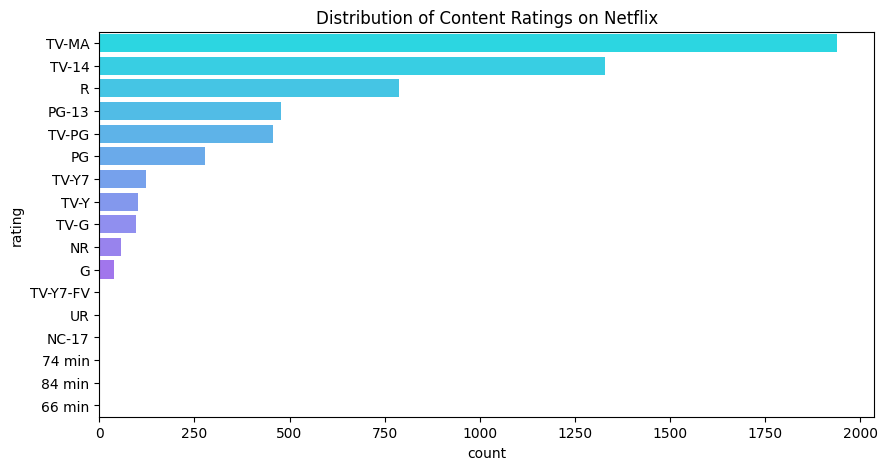

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="cool")
plt.title("Distribution of Content Ratings on Netflix")
plt.show()